<a href="https://colab.research.google.com/github/KatBotkowska/Pandas-Numpy-exercices/blob/master/Warsztaty_WIT_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **WARSZTAT NR 3**

### **Wizualizacja danych w Pythonie**

### <span style="background-color:yellow">**Matplotlib oraz Pyplot**</span>

Matplotlib jest biblioteką Pythona, która umożliwia tworzenie wykresów wysokiej jakości, które mogą być używane na przykład w publikacjach.

Matplotlib sam w sobie jest bardzo obszerną biblioteką. Z pomocą przychodzi Pyplot, będący częścią Matplotlib. Pyplot jest zbiorem funkcji przypominających oprogramowanie MATLAB/Octave. Można go użyć w celu na przykład eksploracji zbioru danych, wizualizacji wyników symulacji, itp.

Pliki można zapisywać jako grafiki wektorowe - ważne, gdy zależy nam na wysokiej jakości wykresów.


- Dokumentacja: https://matplotlib.org/2.0.2/index.html
- Przykładowe zastosowania: https://matplotlib.org/stable/tutorials/introductory/sample_plots.html#sphx-glr-tutorials-introductory-sample-plots-py
- Cheat sheet: https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # importujemy jako 'plt', dla uproszczenia

### **Podstawy**

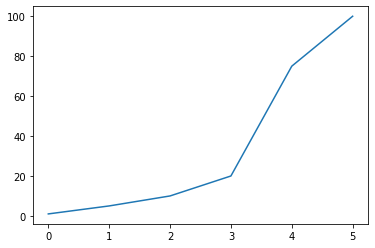

In [ ]:
plt.plot([1,5,10,20,75,100]) # zwracany jest obiekt matplotlib
# plt.show() # wyświetlamy wartości na osi Y, oś X indeksowana jest od zera

In [ ]:
x1 = np.linspace(5,15,101,retstep=True) # tworzymy wektor z N elementami  retsep - zwraca wartość kroku w x1
print(x1[0])
x2 = np.arange(-5,5,0.5) # tworzymy wektor z krokiem
print(x2)

[ 5.   5.1  5.2  5.3  5.4  5.5  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3
  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7
  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1
  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9 10.  10.1 10.2 10.3 10.4 10.5
 10.6 10.7 10.8 10.9 11.  11.1 11.2 11.3 11.4 11.5 11.6 11.7 11.8 11.9
 12.  12.1 12.2 12.3 12.4 12.5 12.6 12.7 12.8 12.9 13.  13.1 13.2 13.3
 13.4 13.5 13.6 13.7 13.8 13.9 14.  14.1 14.2 14.3 14.4 14.5 14.6 14.7
 14.8 14.9 15. ]
[-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5]


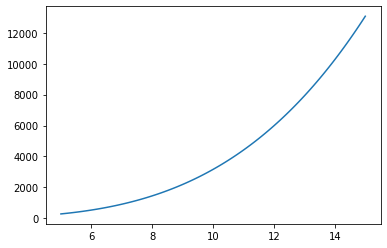

In [ ]:
# wyznaczamy wartości y dla wektorów x1, x2
y1 = x1[0] ** 3.5
#y2 = np.power(x2,2)
plt.plot(x1[0],y1)

### **Szerokość linii, znaczniki, itp.**

- Link do Character & description, color abbreviations -> https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html

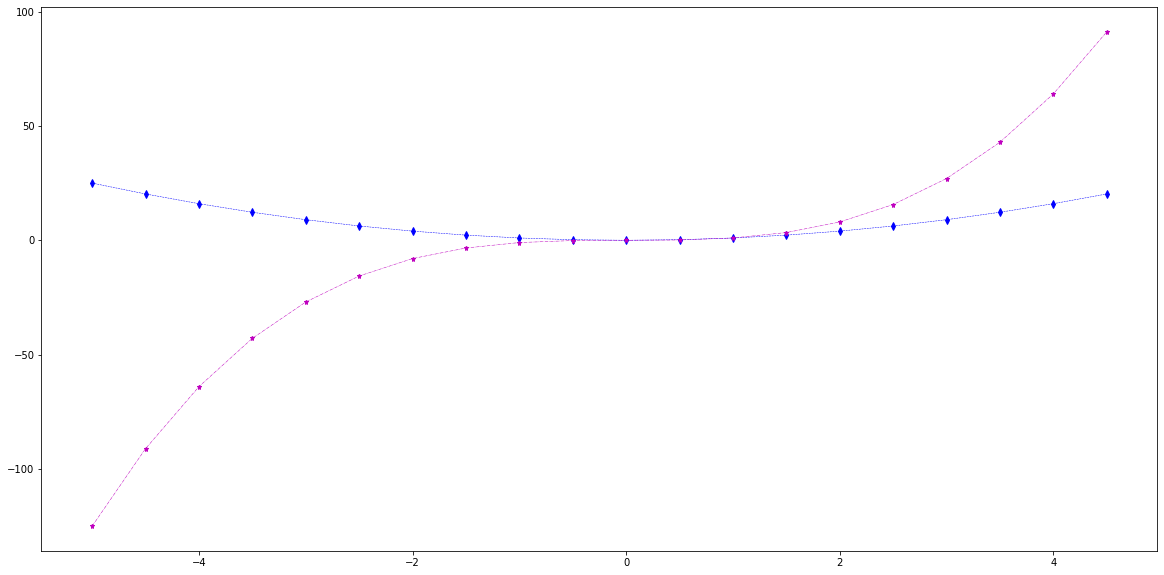

In [ ]:
# Kolejnym krokiem jest ustalenie stylu linii, markera itp.
# Sprawa jest dość istotna w przypadku publikacji naukowych, jeżeli istnieje "ryzyko" wydruku monochromatycznego.
# W takiej sytuacji oznaczenie poszczególnych linii np. za pomocą innego stylu dla każdej pozwala zapobiec niejasnościom.
y2 = x2 ** 2
y3 = x2 ** 3
plt.figure(figsize=(20,10))
plt.plot(x2,y2,"bd--",x2,y3,"m*-.",linewidth=0.5,markersize=5)
plt.show()

- Tworzenie legendy: <code>legend()</code>
- Określanie zakresów osi X,Y: <code>axis()</code>
- Opisy osi X,Y: <code>xlabel()</code>, <code>ylabel()</code>
- Zapis do pliku: <code>savefig()</code>

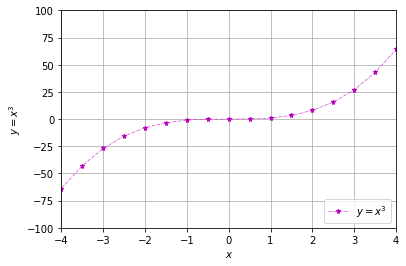

In [ ]:
plt.plot(x2,y3,"m*-.",linewidth=0.5,markersize=5,label='$y=x^3$') # możemy używać wyrażeń LaTeX
plt.axis([-4,4,-100,100])
plt.grid(True)
plt.xlabel("$x$") # możemy używać wyrażeń LaTeX
plt.ylabel("$y=x^3$") # możemy używać wyrażeń LaTeX
plt.legend(loc="lower right")
plt.savefig("wykres.pdf")
# Możemy również zapisywać wykresy jako np. pliki eps.
# https://stackoverflow.com/questions/19638773/matplotlib-plots-lose-transparency-when-saving-as-ps-eps
plt.show()

### **Osie logarytmiczne**

- <code>semilogx()</code> - oś X w skali logarytmicznej
- <code>semilogy()</code> - oś Y w skali logarytmicznej
- <code>loglog()</code> - obie osie w skali logarytmicznej

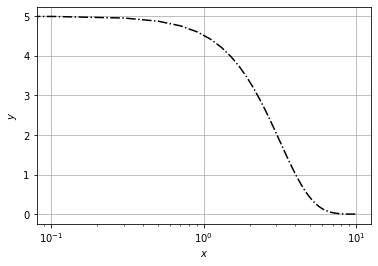

In [ ]:
x5 = np.linspace(-10,10,100)
y5 = 5*np.exp((-x5**2)/10)
plt.semilogx(x5,y5,"k-.")  # k - kolor czarny
plt.grid(True)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

In [ ]:
plt.semilogy(x5,y5,"k-.")
# Albo:
#plt.plot(y5,"k-.")
#plt.yscale('log')
plt.grid(True)
plt.show()

### **Subplots**

Funkcja subplots umożliwia wykreślanie wielu wykresów w jednym oknie.

Jeżeli chcemy wyświetlić 8 wykresów w oknie 4 wiersze na 2 kolumny, mamy łącznie 8 'podwykresów', numerowanych najpierw wzdłuż wiersza, a następnie kolumnami.

Numeracja będzie zatem wyglądać tak:

1 2

3 4

5 6

7 8


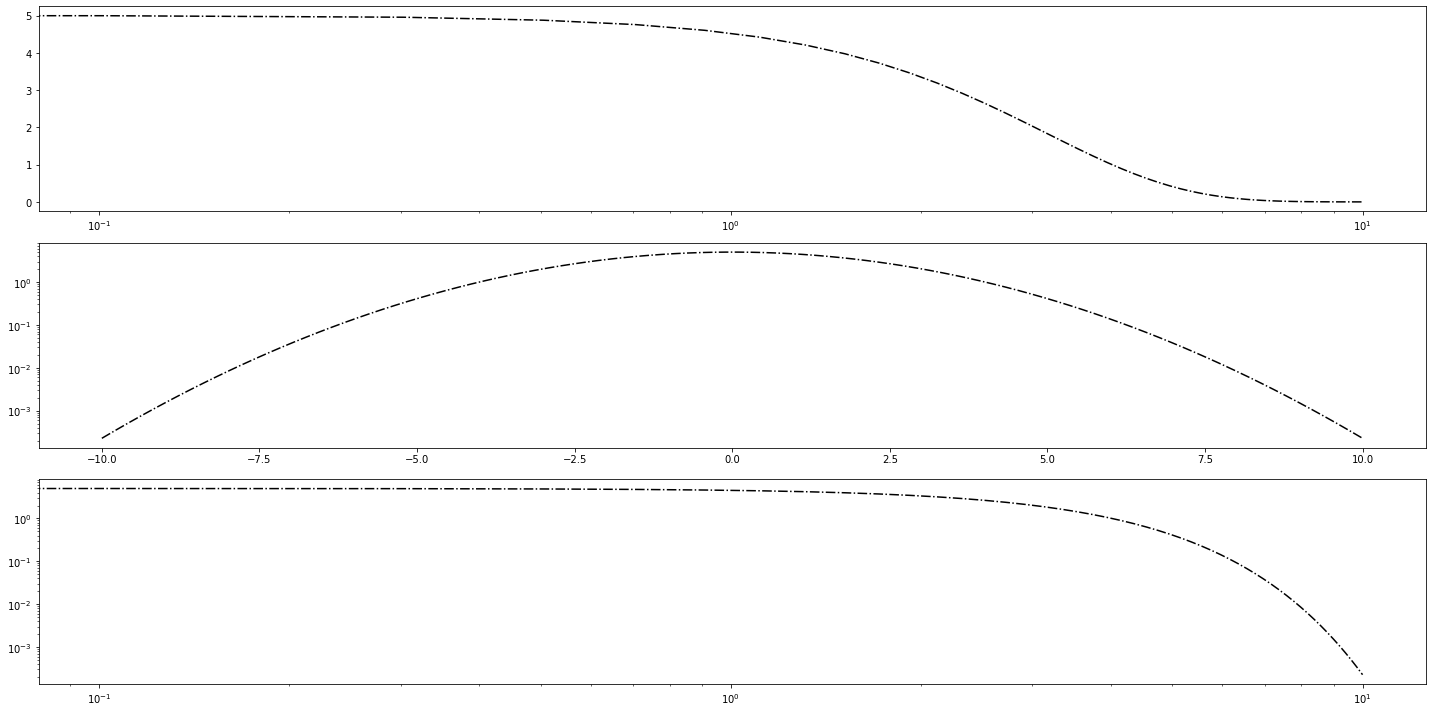

In [ ]:
# Przykład [3 x 1]
plt.figure(figsize=(20,10))  #figsize to rozmiar rysunku
plt.subplot(311) # numeracja: liczba wierszy (stała), liczba kolumn (stała), numer danego wykresu
plt.semilogx(x5,y5,"k-.")
#plt.xscale('symlog')
plt.subplot(312)
plt.semilogy(x5,y5,"k-.")
#plt.yscale('symlog')
plt.subplot(313)
plt.loglog(x5,y5,"k-.")
plt.tight_layout() # ważna funkcja! zapewnia że wykresy na siebie nie nachodzą - są osobno
plt.show()

### **Histogramy**

In [ ]:
#podłączenie google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv('/content/gdrive/MyDrive/WiT_workshops/[datasets]/PRSA_Data_Aotizhongxin_20130301-20170228.csv', sep=',')
data_2=pd.read_csv('/content/gdrive/MyDrive/WiT_workshops/[datasets]/PRSA_Data_Changping_20130301-20170228.csv', sep=',')
data_3 = pd.read_csv('/content/gdrive/MyDrive/WiT_workshops/[datasets]/PRSA_Data_Tiantan_20130301-20170228.csv', sep=',')

In [ ]:
#data = pd.read_csv('PRSA_Data_Aotizhongxin_20130301-20170228.csv', sep=',')
#data_2 = pd.read_csv('PRSA_Data_Changping_20130301-20170228.csv', sep=',')
#data_3 = pd.read_csv('PRSA_Data_Tiantan_20130301-20170228.csv', sep=',')
data_full = data.append(data_2)
data_full = data_full.append(data_3)
data.rename({'PM2.5': 'PM2_5'}, axis=1, inplace=True)
data['PM10'].fillna(data['PM10'].median(), inplace=True)
data['SO2'].fillna(data['SO2'].median(), inplace=True)
data['NO2'].fillna(data['NO2'].mean(), inplace=True)
data['CO'].fillna(data['CO'].median(), inplace=True)
data['O3'].fillna(data['O3'].median(), inplace=True)

In [ ]:
data

,No,year,month,day,hour,PM2_5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,12.0,29.0,5.0,35.0,400.0,95.0,12.5,1013.5,-16.2,0.0,NW,2.4,Aotizhongxin
35060,35061,2017,2,28,20,13.0,37.0,7.0,45.0,500.0,81.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Aotizhongxin
35061,35062,2017,2,28,21,16.0,37.0,10.0,66.0,700.0,58.0,10.8,1014.2,-13.3,0.0,NW,1.1,Aotizhongxin
35062,35063,2017,2,28,22,21.0,44.0,12.0,87.0,700.0,35.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Aotizhongxin


In [ ]:
data2015 = data.loc[data['year'] == 2015]
data2015

,No,year,month,day,hour,PM2_5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
16104,16105,2015,1,1,0,13.0,50.0,19.0,29.0,500.0,28.0,-1.0,1027.0,-22.4,0.0,NNW,4.4,Aotizhongxin
16105,16106,2015,1,1,1,11.0,30.0,15.0,31.0,600.0,27.0,-1.0,1027.0,-23.7,0.0,N,5.6,Aotizhongxin
16106,16107,2015,1,1,2,13.0,33.0,16.0,32.0,600.0,26.0,-1.0,1028.0,-23.7,0.0,N,4.2,Aotizhongxin
16107,16108,2015,1,1,3,10.0,29.0,10.0,25.0,500.0,31.0,-1.0,1029.0,-24.4,0.0,N,4.4,Aotizhongxin
16108,16109,2015,1,1,4,12.0,25.0,14.0,33.0,700.0,24.0,-2.0,1027.0,-23.2,0.0,ENE,1.4,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24859,24860,2015,12,31,19,98.0,148.0,28.0,119.0,2600.0,7.0,-1.4,1026.3,-8.6,0.0,E,1.0,Aotizhongxin
24860,24861,2015,12,31,20,98.0,165.0,24.0,113.0,3300.0,8.0,-2.5,1026.2,-8.4,0.0,E,1.3,Aotizhongxin
24861,24862,2015,12,31,21,107.0,187.0,27.0,117.0,4000.0,10.0,-2.7,1025.8,-8.0,0.0,ENE,0.9,Aotizhongxin
24862,24863,2015,12,31,22,150.0,228.0,38.0,129.0,4900.0,12.0,-3.5,1025.5,-7.6,0.0,ENE,0.4,Aotizhongxin


---

Do wykreślania histogramów możemy skorzystać z metody <code>hist()</code> biblioteki Pandas.

Dokumentacja: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html

Jednym z parametrów metody jest **kwargs, czyli dowolna liczba tzw. keyword arguments. W tym miejscu można przekazać do metody wybrane keyword arguments z metody <code>hist()</code> biblioteki Matplotlib.
    
Dokumentacja: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist

Istnieje również kilka innych możliwości - dla zainteresowanych proponujemy zapoznanie się z: https://realpython.com/python-histograms/

---

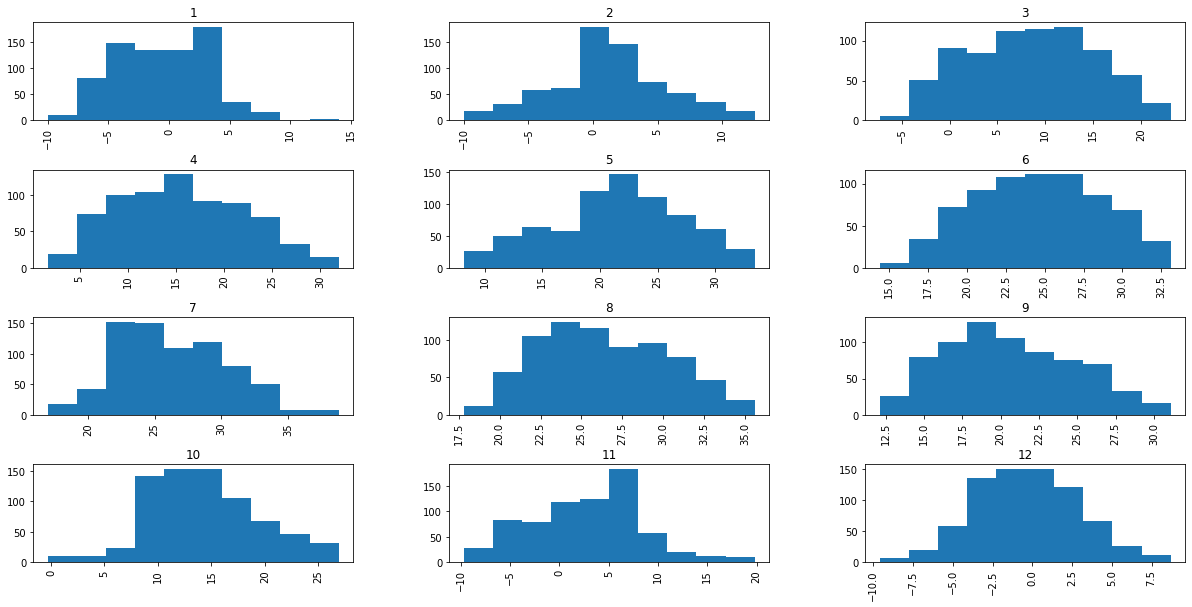

In [ ]:
# Wykreślamy histogram temperatury w kolejnych miesiącach 2015 roku.
data2015.hist(column='TEMP', by='month', bins=10, figsize=(20,10)); #jak jest średnik, to nie pokaże wartości zmiennych w outpucie

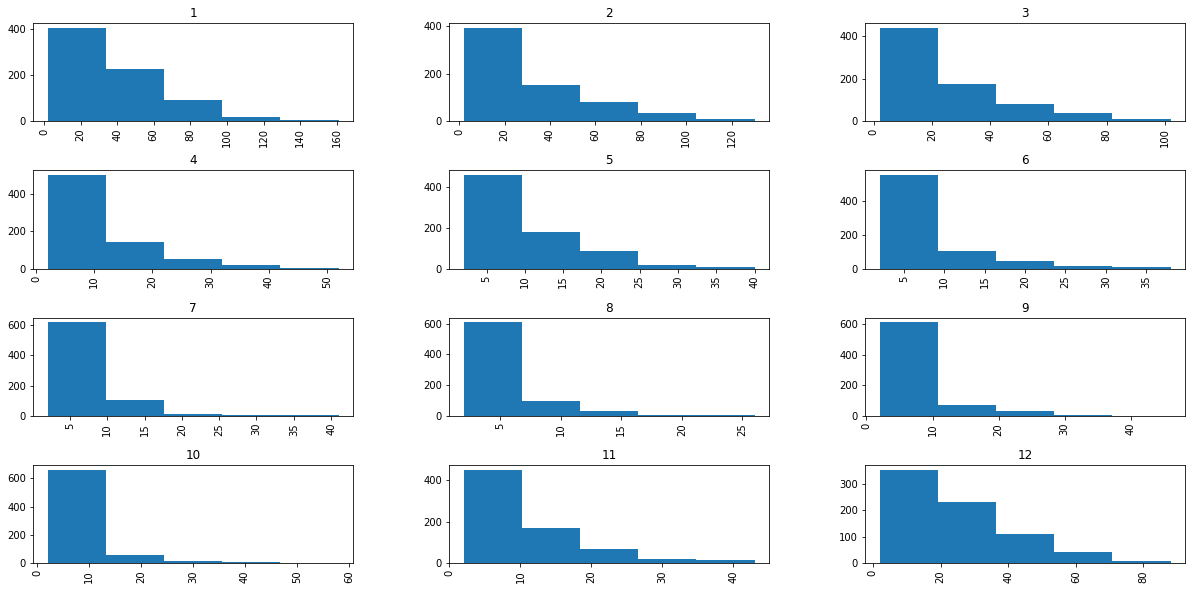

In [ ]:
# Wykreślamy histogram częstości występowania określonego stężenia SO2 w kolejnych miesiącach 2015 roku.
data2015.hist(column='SO2', by='month', bins=5, figsize=(20,10));    #jak jest średnik to nie wyświetli wartości zmiennych, a jedynie same wykresy

**Inne przykłady** zastosowań dla "naszych" danych:

- Wyświetl medianę PM10 dla kolejnych lat.

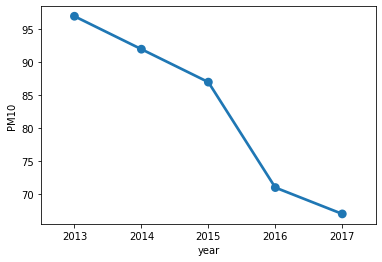

In [ ]:
df = data[['PM10','year']].groupby(["year"]).median().reset_index()
sns.pointplot(x='year', y='PM10', data=df)

- Wyświetl medianę temperatury dla kolejnych miesięcy roku 2015.

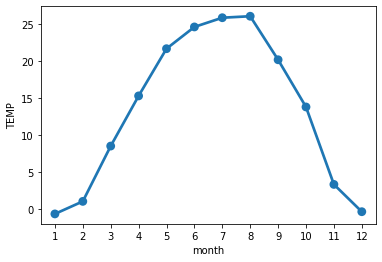

In [ ]:
df = data2015[['TEMP','month']].groupby(["month"]).median().reset_index()
sns.pointplot(x='month', y='TEMP', data=df)

**Wykres punktowy** - scatter plot.

Dokumentacja: https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.scatter.html

Jest to wykres obrazujący związek pomiędzy dwoma zmiennymi.

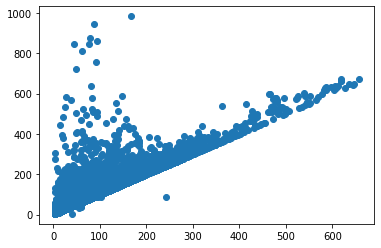

In [ ]:
# Sprawdźmy związek PM2.5 i PM10 w 2015 roku.
plt.scatter(data2015.PM2_5,data2015.PM10);

**Wykres pudełkowy** - box plot.

Dokumentacja: https://seaborn.pydata.org/generated/seaborn.boxplot.html

Jest to forma graficznej prezentacji rozkładu cechy statystycznej.

"Pudełka" rysowane są w ten sposób, że linia pośrodku pudełka to mediana z danych.
Linia na lewo od środkowej wyznacza pierwszy kwartyl, czyli medianę z danych na lewo od mediany.
Linia na prawo od środkowej wyznacza trzeci kwartyl, czyli medianę z danych na prawo od mediany.
Tzw. "wąsy" to nic innego jak minimum i maksimum z danych.

Wykres pudełkowy pozwala wykryć asymetrię rozkładu danych, jak również błędy grube w zbiorze danych.

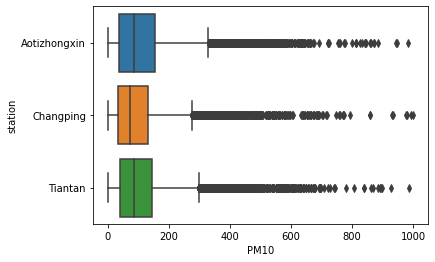

In [ ]:
# Sprawdźmy wykres pudełkowy w praktyce - zobaczmy rozkład PM10 dla wybranych stacji.
sns.boxplot(y=data_full["station"], x=data_full["PM10"]);
plt.show()

### <span style="background-color:yellow">**Bqplot**</span>

Przydatny dodatek do Jupytera, który umożliwia tworzenie interaktywnych wykresów.

Instalacja (jedna z możliwości):

```
pip install bqplot
jupyter nbextension enable --py --sys-prefix bqplot
```

https://pypi.org/project/bqplot/

https://github.com/bqplot/bqplot

Dokumentacja: https://bqplot.readthedocs.io/en/latest/index.html

Dla zainteresowanych, wiele przykładów wykresów: https://coderzcolumn.com/tutorials/data-science/interactive-plotting-in-python-jupyter-notebook-using-bqplot

In [ ]:
pip install bqplot

In [ ]:
#sprawdzić jak dla collab to zrobić
nbextension enable --py --sys-prefix bqplot

SyntaxError: ignored

In [ ]:
# Interaktywny wykres punktowy z jednego z poprzednich przykładów -TUTAJ NIE DZIAŁA, SPRAWDZIĆ JAK TO ZROBI BY BYŁO INTERAKTYWNIE
from bqplot import pyplot as plt
fig = plt.figure()
fig.layout.height = "300px"
fig.layout.width = "500px"
plt.scatter(data2015.PM2_5,data2015.PM10)
plt.xlabel("PM2.5")
plt.ylabel("PM10")
plt.show()

In [ ]:
# Interaktywny wykres liniowy z jednego z poprzednich przykładów
fig = plt.figure(title="Temperature versus month in 2015, station Aotizhongxin")
fig.layout.height = "300px"
fig.layout.width = "500px"
plt.plot(x=df['month'], y=df['TEMP'])
plt.ylabel("TEMP")
plt.xlabel("Month")
plt.show()

### <span style="background-color:yellow">**Plotly**</span>

Jest to darmowa, open-source'owa biblioteka Pythona służąca do tworzenia interaktywnych wykresów. 
Na bazie Dash można budować aplikacje do analizy danych bazujące na figurach utworzonych przy pomocy Plotly.
Jupyter-dash umożliwia realizację tego w Jupyter Notebook.

```
pip install jupyter-dash
```

Kompletny tutorial w formie notatnika jest dostępny na Githubie:

https://github.com/plotly/jupyter-dash/blob/master/notebooks/getting_started.ipynb

Inne przydatne źródła:

https://www.kaggle.com/mehmetkasap/data-visualization-tools-seaborn-and-plotly

https://www.statworx.com/at/blog/how-to-build-a-dashboard-in-python-plotly-dash-step-by-step-tutorial/

https://pbpython.com/plotly-dash-intro.html

I wiele, wiele innych... :)

In [ ]:
pip install dash

     |████████████████████████████████| 81kB 3.8MB/s 
     |████████████████████████████████| 1.0MB 19.9MB/s 
     |████████████████████████████████| 3.5MB 40.7MB/s 
     |████████████████████████████████| 194kB 43.6MB/s 
     |████████████████████████████████| 1.8MB 40.4MB/s 
     |████████████████████████████████| 358kB 53.5MB/s 
  Created wheel for dash: filename=dash-1.19.0-cp37-none-any.whl size=84011 sha256=d4d7b29a7f72d965c8a957a721ae901d7f1b6ff0af21ce10b4951648773f1c15
  Stored in directory: /root/.cache/pip/wheels/f7/50/a7/a230ff7f503b10120bff18c2524a375bb85a61ce6b519c8a77
  Created wheel for flask-compress: filename=Flask_Compress-1.9.0-cp37-none-any.whl size=7259 sha256=6edeeaadfc54cf5517d9d75d7698128bd1ce4c9d9d19a52e3396958332a01511
  Stored in directory: /root/.cache/pip/wheels/0d/56/7d/e0c50541e5421b8291d958afb098c23818989e29d91a1edac5
  Created wheel for dash-renderer: filename=dash_renderer-1.9.0-cp37-none-any.whl size=1014870 sha256=29b07e1fe5bcbc71b44a95e1a5776b563a0b

to sprawdzić
https://stackoverflow.com/questions/53622518/launch-a-dash-app-in-a-google-colab-notebook


In [ ]:
# Napiszemy sobie prostą aplikację do porównywania związku PM2.5 i PM10 w kolejnych wybranych latach, dla stacji Aotizhongxin
#dash tworzy strukturę aplikacji, plotly odpowiada za wygląd
import dash
from jupyter_dash import JupyterDash
external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']
import dash_core_components as dcc
import dash_html_components as html
import plotly.graph_objs as go
import pandas as pd

data2013 = data.loc[data['year'] == 2013]
data2016 = data.loc[data['year'] == 2016]
trace1 = go.Scatter(
                    x = data2015.PM2_5,
                    y = data2015.PM10,
                    mode = "markers",
                    name = "PM10 vs PM2.5 - 2015",
                    marker = dict(color = 'red'),
                    text= "PM10 vs PM2.5 - 2015")
trace2 = go.Scatter(
                    x = data2016.PM2_5,
                    y = data2016.PM10,
                    mode = "markers",
                    name = "PM10 vs PM2.5 - 2016",
                    marker = dict(color = 'green'),
                    text= "PM10 vs PM2.5 - 2016")
trace3 = go.Scatter(
                    x = data2013.PM2_5,
                    y = data2013.PM10,
                    mode = "markers",
                    name = "PM10 vs PM2.5 - 2013",
                    marker = dict(color = 'blue'),
                    text= "PM10 vs PM2.5 - 2013")

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)
app.layout = html.Div(children=[
    html.H1(children='Air pollution in China: PM2.5 vs PM10'),
    html.Div(children='''Aotizhongxin station'''),
    dcc.Graph(
        id='example-graph',
        figure={
            'data': [trace1, trace2, trace3],
            'layout':
            go.Layout(title='Scatter plots for different years')
        })
])

app.run_server(mode="inline")

ModuleNotFoundError: ignored